<a href="https://colab.research.google.com/github/Ranjan4Kumar/AdaBoost-SAMME-and-SAMME.R/blob/main/multi_class_adaboosted_decision_trees_samme_samme_r_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAMME - Algorithm
SAMME (Stagewise Additive Modeling using a Multi-class Exponential loss) is an algorithm used in multiclass classification for boosting weak learners (typically decision trees) into a strong ensemble classifier. SAMME is an extension of the AdaBoost (Adaptive Boosting) algorithm and is designed to handle problems with more than two classes.

**Algorithm Steps:**

1. **Initialize Weights:** Assign equal weights to all training examples in the dataset.

2. **For each boosting iteration:**
   a. Train a weak learner (e.g., decision stump) on the training data with the current weights.
   b. Calculate the error of the weak learner on the training data.

3. **Calculate Learner Contribution:** Calculate the contribution of the weak learner to the ensemble based on its error. A learner with lower error has a higher contribution.

4. **Update Weights:** Update the weights of the misclassified examples to give them higher importance for the next iteration. The weights are increased for misclassified examples and decreased for correctly classified examples.

5. **Compute Ensemble Weight:** Compute the weight of the current weak learner in the final ensemble. This weight considers both the learner's error and the number of boosting iterations.

6. **Combine Predictions:** Combine the predictions of all learners (weighted by their ensemble weights) to make a final prediction for each example.

7. **Repeat Steps 2-6:** Repeat the process for a predefined number of iterations or until a stopping criterion is met.

8. **Final Prediction:** The final prediction is based on the weighted majority vote of the ensemble's predictions.

**Benefits of SAMME:**
- SAMME extends AdaBoost to multiclass classification problems.
- It handles problems with more than two classes by training multiple weak learners, each distinguishing one class from the rest.

**Limitations and Considerations:**
- Like AdaBoost, SAMME can be sensitive to noisy data and outliers.
- SAMME may struggle when dealing with datasets with a large number of classes or high-dimensional feature spaces.

**Note:**
SAMME was later extended to SAMME.R, which introduced a variant of the algorithm using real-valued class probabilities rather than categorical class labels. SAMME.R can provide better convergence properties and performance in some cases.


# SAMME.R - Algorithm

SAMME.R (Stagewise Additive Modeling using a Multi-class Exponential loss with Real-valued Predictions) is an enhancement of the original SAMME algorithm designed for multiclass classification. It addresses some limitations of the original SAMME algorithm by using real-valued class probabilities for prediction. SAMME.R is used in boosting-based ensemble methods, such as AdaBoostClassifier in scikit-learn (Python library), to improve the performance of multiclass classification problems.

**Algorithm Steps:**

1. **Initialize Weights:** Assign equal weights to all training examples in the dataset.

2. **For each boosting iteration:**
   a. Train a weak learner (e.g., decision stump) on the training data with the current weights.
   b. Calculate the weighted error of the weak learner on the training data.

3. **Calculate Learner Contribution:** Calculate the contribution of the weak learner to the ensemble based on its weighted error. A learner with lower weighted error has a higher contribution.

4. **Compute Weighted Class Probabilities:** Compute the weighted class probabilities based on the current ensemble. This involves calculating the sum of contributions for each class label.

5. **Compute Scaling Factor:** Compute a scaling factor to adjust the class probabilities such that they sum to 1.

6. **Update Weights:** Update the weights of the misclassified examples to give them higher importance for the next iteration. The weights are increased for misclassified examples and decreased for correctly classified examples.

7. **Compute Ensemble Weight:** Compute the weight of the current weak learner in the final ensemble. This weight considers both the learner's contribution and the number of boosting iterations.

8. **Combine Predictions:** Combine the predictions of all learners (weighted by their ensemble weights) to make a final prediction for each example.

9. **Repeat Steps 2-8:** Repeat the process for a predefined number of iterations or until a stopping criterion is met.

10. **Final Prediction:** The final prediction is based on the weighted majority vote of the ensemble's predictions.

**Benefits of SAMME.R:**
- SAMME.R extends the original SAMME algorithm to use real-valued class probabilities, which can provide better convergence properties and improved performance.
- It handles multiclass classification problems more effectively by considering the real-valued class probabilities.

**Limitations and Considerations:**
- While SAMME.R addresses some limitations of SAMME, it may still be sensitive to noisy data and outliers.
- Hyperparameter tuning, such as the number of boosting iterations, is important for optimal performance.

SAMME.R is a valuable variant of the boosting algorithm for multiclass classification tasks, and it is widely used in machine learning libraries like scikit-learn.

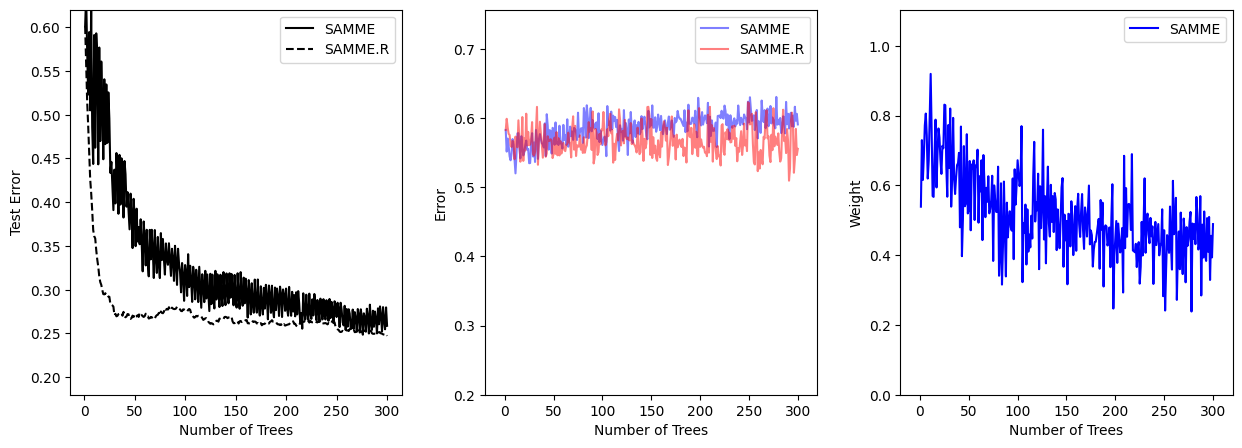

In [ ]:
# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X, y = make_gaussian_quantiles(
    n_samples=13000, n_features=10, n_classes=3, random_state=1
)

n_split = 3000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1.5,
    algorithm="SAMME",
)

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_test_predict in zip(
    bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)
):
    real_test_errors.append(1.0 - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(1.0 - accuracy_score(discrete_test_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1), discrete_test_errors, c="black", label="SAMME")
plt.plot(
    range(1, n_trees_real + 1),
    real_test_errors,
    c="black",
    linestyle="dashed",
    label="SAMME.R",
)
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel("Test Error")
plt.xlabel("Number of Trees")

plt.subplot(132)
plt.plot(
    range(1, n_trees_discrete + 1),
    discrete_estimator_errors,
    "b",
    label="SAMME",
    alpha=0.5,
)
plt.plot(
    range(1, n_trees_real + 1), real_estimator_errors, "r", label="SAMME.R", alpha=0.5
)
plt.legend()
plt.ylabel("Error")
plt.xlabel("Number of Trees")
plt.ylim((0.2, max(real_estimator_errors.max(), discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights, "b", label="SAMME")
plt.legend()
plt.ylabel("Weight")
plt.xlabel("Number of Trees")
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

SAMME (Stagewise Additive Modeling using a Multi-class Exponential loss) and SAMME.R (Stagewise Additive Modeling using a Multi-class Exponential loss with Real-valued Predictions) are specific algorithms designed for multiclass classification within the boosting framework. While these are important algorithms, there are other variations and extensions of boosting-based additive modeling that can be used for both classification and regression tasks. Here are a few notable ones:

**1. AdaBoost (Adaptive Boosting):** AdaBoost is the original boosting algorithm that inspired SAMME. It can be used for both binary and multiclass classification. It focuses on misclassified examples and assigns increasing weights to them to improve accuracy.

**2. Gradient Boosting:** Gradient Boosting is a general boosting algorithm that minimizes a loss function by iteratively adding weak learners. It includes variations like XGBoost, LightGBM, and CatBoost, which have become popular due to their enhanced performance and optimization techniques.

**3. LogitBoost:** LogitBoost is an extension of AdaBoost that aims to minimize the logistic loss function by updating the weights of both samples and classes. It can handle binary and multiclass classification.

**4. BrownBoost:** BrownBoost modifies AdaBoost by introducing a margin term into the loss function, aiming to improve robustness to outliers and noisy data.

**5. LPBoost:** LPBoost (Linear Programming Boosting) formulates boosting as a linear programming problem and focuses on optimizing margin-based loss functions.

**6. GentleBoost:** GentleBoost is designed to address the issue of overfitting by introducing a shrinkage parameter that controls the contribution of each weak learner.

**7. RUSBoost:** RUSBoost (Random Undersampling Boosting) combines boosting with random undersampling of the majority class to address class imbalance.

**8. LogitBoost:** LogitBoost optimizes a logistic loss function by using gradient descent to fit a logistic regression model.

**9. TotalBoost:** TotalBoost is a boosting algorithm that aims to minimize a margin-based loss function by using a weighted combination of models.

These algorithms all operate within the boosting framework and aim to create strong predictive models by combining multiple weak learners. Each algorithm may have its own strengths and weaknesses, and the choice of algorithm may depend on factors such as the specific problem, the dataset, and computational considerations. It's important to experiment with different algorithms and assess their performance to determine the best approach for your task.